In [2]:
!pip install geopy mlflow scikit-learn pandas matplotlib seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 107.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 733.7/733.7 kB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.4/118.4 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.2/196.2 kB 16.3 MB/s eta 0:00:00


In [3]:
# Upload and Preview Dataset

from google.colab import files
uploaded = files.upload()


Saving amazon_delivery.csv to amazon_delivery.csv


In [4]:
# Load the data file

import pandas as pd

df = pd.read_csv('amazon_delivery.csv')
df.head()


,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


In [5]:
import numpy as np
from geopy.distance import geodesic

# Calculate geospatial distance
def calculate_distance(row):
    store_coords = (row['Store_Latitude'], row['Store_Longitude'])
    drop_coords = (row['Drop_Latitude'], row['Drop_Longitude'])
    return geodesic(store_coords, drop_coords).km

df['Distance_km'] = df.apply(calculate_distance, axis=1)

# Convert time columns
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Order_Time'] = pd.to_datetime(df['Order_Time'], errors='coerce')
df['Pickup_Time'] = pd.to_datetime(df['Pickup_Time'], errors='coerce')


# Time-based features
df['Order_Hour'] = df['Order_Time'].dt.hour
df['Order_DayOfWeek'] = df['Order_Date'].dt.dayofweek
df['Pickup_Delay_Minutes'] = (df['Pickup_Time'] - df['Order_Time']).dt.total_seconds() / 60

<ipython-input-5-0c31ddbc3b35>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order_Time'] = pd.to_datetime(df['Order_Time'], errors='coerce')
<ipython-input-5-0c31ddbc3b35>:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Pickup_Time'] = pd.to_datetime(df['Pickup_Time'], errors='coerce')


# Previous code threw an error due to NaN values in Order_Time, so we have checked the number of NaN values and decided to remove

In [8]:
# Check for missing values in each column
print(df.isnull().sum())

Order_ID                 0
Agent_Age                0
Agent_Rating            54
Store_Latitude           0
Store_Longitude          0
Drop_Latitude            0
Drop_Longitude           0
Order_Date               0
Order_Time              91
Pickup_Time              0
Weather                 91
Traffic                  0
Vehicle                  0
Area                     0
Delivery_Time            0
Category                 0
Distance_km              0
Order_Hour              91
Order_DayOfWeek          0
Pickup_Delay_Minutes    91
dtype: int64


In [6]:
# Remove rows where 'Order_Time' is NaT
df_cleaned = df.dropna(subset=['Order_Time'])

# Display the shape of the original and cleaned DataFrame to see how many rows were removed
print("Original DataFrame shape:", df.shape)
print("Cleaned DataFrame shape:", df_cleaned.shape)

Original DataFrame shape: (43739, 20)
Cleaned DataFrame shape: (43648, 20)


In [7]:
# Data Cleaning:

# Start with the original DataFrame to ensure original columns are present
df_cleaned = df.copy()

# Remove duplicates
df_cleaned.drop_duplicates(inplace=True)

# Handle missing values
df_cleaned.dropna(inplace=True) # Apply dropna directly to df_cleaned

# The one-hot encoding will be done in a separate cell after visualizations

# Exploratory Data Analysis(EDA)

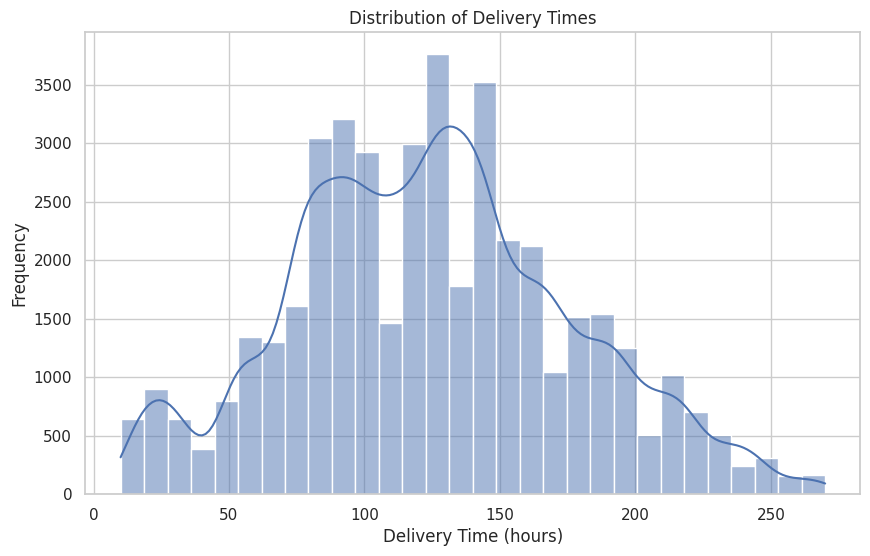

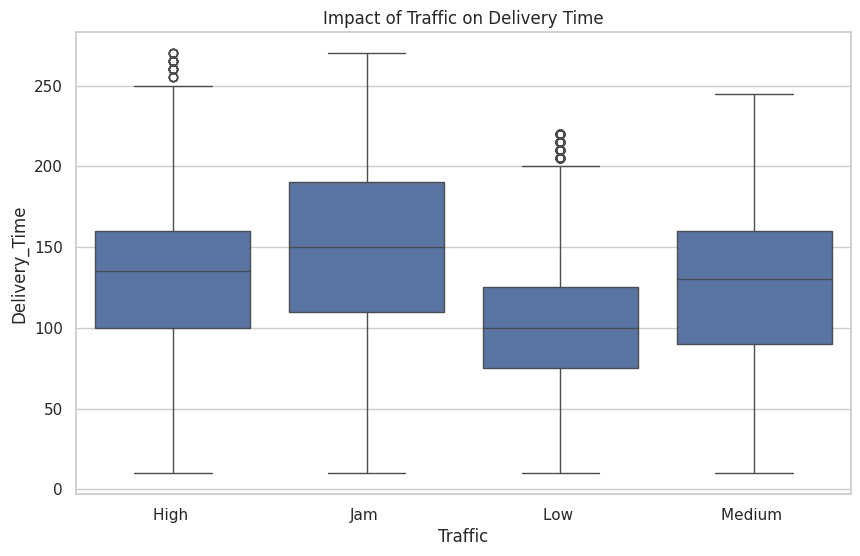

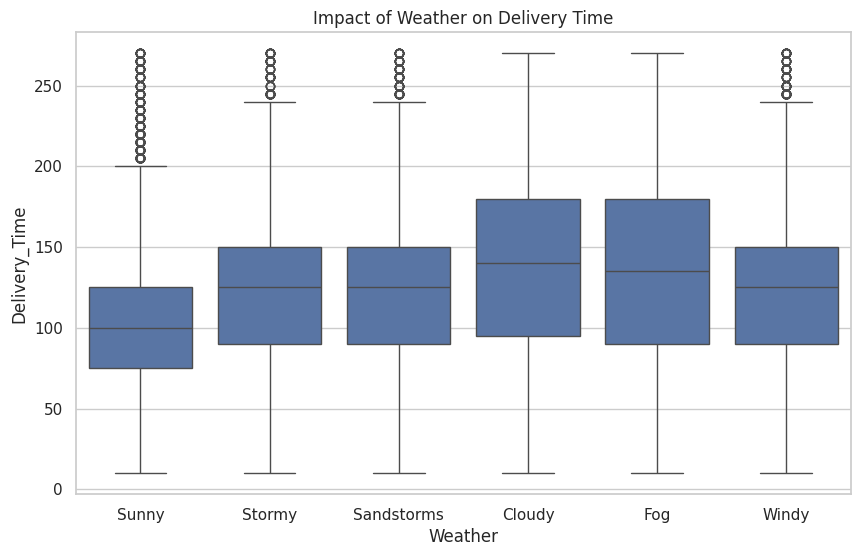

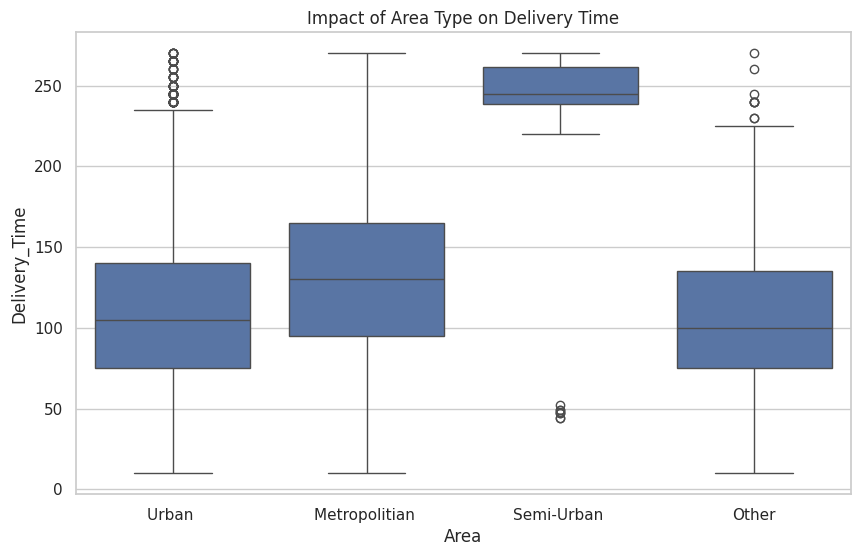

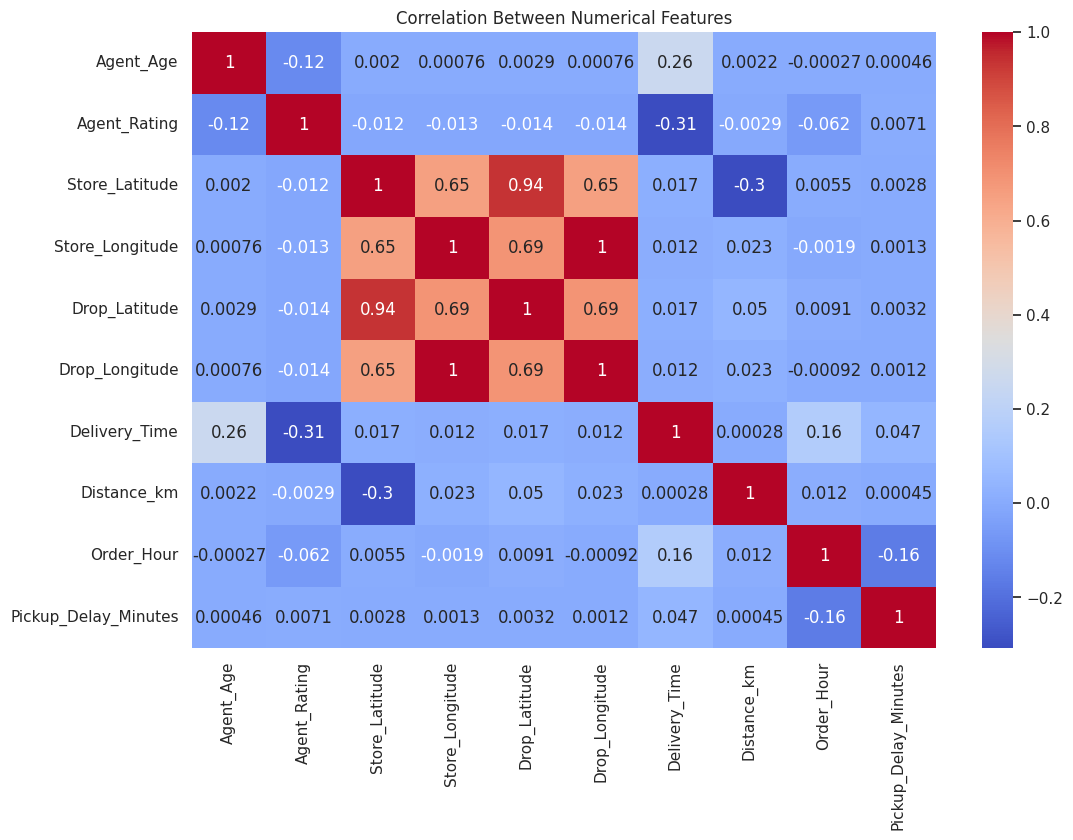

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set default Seaborn style
sns.set(style="whitegrid")

# 1. Distribution of Delivery Time
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Delivery_Time'], bins=30, kde=True)
plt.title("Distribution of Delivery Times")
plt.xlabel("Delivery Time (hours)")
plt.ylabel("Frequency")
plt.show()

# 2. Boxplot: Traffic vs Delivery Time
plt.figure(figsize=(10, 6))
sns.boxplot(x='Traffic', y='Delivery_Time', data=df_cleaned)
plt.title("Impact of Traffic on Delivery Time")
plt.show()

# 3. Boxplot: Weather vs Delivery Time
plt.figure(figsize=(10, 6))
sns.boxplot(x='Weather', y='Delivery_Time', data=df_cleaned)
plt.title("Impact of Weather on Delivery Time")
plt.show()

# 4. Boxplot: Area vs Delivery Time
plt.figure(figsize=(10, 6))
sns.boxplot(x='Area', y='Delivery_Time', data=df_cleaned)
plt.title("Impact of Area Type on Delivery Time")
plt.show()

# 5. Correlation heatmap (numeric features only)
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numerical Features")
plt.show()


In [9]:
print(df_cleaned.columns.tolist())


['Order_ID', 'Agent_Age', 'Agent_Rating', 'Store_Latitude', 'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude', 'Order_Date', 'Order_Time', 'Pickup_Time', 'Weather', 'Traffic', 'Vehicle', 'Area', 'Delivery_Time', 'Category', 'Distance_km', 'Order_Hour', 'Order_DayOfWeek', 'Pickup_Delay_Minutes']


In [11]:
# Apply One Encoding

# Remove leading/trailing spaces (important for consistent column names)
df_cleaned.columns = df_cleaned.columns.str.strip()

# Apply one-hot encoding
df_encoded = pd.get_dummies(df_cleaned, columns=['Weather', 'Traffic', 'Vehicle', 'Area', 'Category'], drop_first=True)


In [12]:
# Now Let us a. Split the data into training and testing sets b.Train multiple regression models and c. Track them using MLflow.

# a. Splitting the data

from sklearn.model_selection import train_test_split

# Define features and target
X = df_encoded.drop(['Order_ID', 'Delivery_Time', 'Order_Date', 'Order_Time', 'Pickup_Time'], axis=1)
y = df_encoded['Delivery_Time']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)




Train shape: (34875, 38)
Test shape: (8719, 38)


In [14]:
# Import necessary packages

import mlflow
import mlflow.sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Train & Track Models with MLflow

In [17]:
import numpy as np # Import numpy
import mlflow
import mlflow.sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(model, name):
    mlflow.set_experiment("DeliveryTimePrediction")
    with mlflow.start_run(run_name=name):
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

        # Metrics
        mse = mean_squared_error(y_test, preds) # Calculate MSE first
        rmse = np.sqrt(mse) # Then calculate RMSE by taking the square root of MSE
        mae = mean_absolute_error(y_test, preds)
        r2 = r2_score(y_test, preds)

        # Log to MLflow
        mlflow.log_param("model", name)
        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("mae", mae)
        mlflow.log_metric("r2", r2)
        mlflow.sklearn.log_model(model, name + "_model")

        print(f"{name} Results: RMSE={rmse:.2f}, MAE={mae:.2f}, R²={r2:.2f}")

# Train models
evaluate_model(LinearRegression(), "LinearRegression")
evaluate_model(RandomForestRegressor(n_estimators=100, random_state=42), "RandomForest")
evaluate_model(GradientBoostingRegressor(n_estimators=100, random_state=42), "GradientBoosting")

2025/06/07 15:16:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


LinearRegression Results: RMSE=32.17, MAE=25.51, R²=0.61


2025/06/07 15:17:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


RandomForest Results: RMSE=22.83, MAE=17.51, R²=0.80


2025/06/07 15:17:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


GradientBoosting Results: RMSE=25.26, MAE=19.59, R²=0.76


In [18]:
Results = []

In [21]:
import numpy as np # Import numpy

# Define the models to train and evaluate
models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

Results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred) # Calculate MSE
    rmse = np.sqrt(mse) # Calculate RMSE by taking the square root of MSE
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    Results.append({
        "Model": name,
        "RMSE": round(rmse, 2),
        "MAE": round(mae, 2),
        "R²": round(r2, 4)
    })

# Convert to DataFrame for comparison
results_df = pd.DataFrame(Results)
results_df

,Model,RMSE,MAE,R²
0,LinearRegression,32.17,25.51,0.6064
1,RandomForest,22.83,17.51,0.8019
2,GradientBoosting,25.26,19.59,0.7574


In [22]:
# Let us save the trained Random Forest model to a .pkl file so you can load it later in your Streamlit app

In [25]:
import joblib

# Assuming 'rf_model' is your trained Random Forest model
rf_model = models['RandomForest']  # or wherever you have your fitted model

# Save model to file
joblib_file = "random_forest_model.pkl"
joblib.dump(rf_model, joblib_file)

print(f"Model saved to {joblib_file}")


Model saved to random_forest_model.pkl


In [24]:
print(models.keys())


dict_keys(['LinearRegression', 'RandomForest', 'GradientBoosting'])


In [26]:
# Assuming your final training DataFrame is called 'X_train' or 'df_features'
print(X_train.columns.tolist())


['Agent_Age', 'Agent_Rating', 'Store_Latitude', 'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude', 'Distance_km', 'Order_Hour', 'Order_DayOfWeek', 'Pickup_Delay_Minutes', 'Weather_Fog', 'Weather_Sandstorms', 'Weather_Stormy', 'Weather_Sunny', 'Weather_Windy', 'Traffic_Jam ', 'Traffic_Low ', 'Traffic_Medium ', 'Vehicle_scooter ', 'Vehicle_van', 'Area_Other', 'Area_Semi-Urban ', 'Area_Urban ', 'Category_Books', 'Category_Clothing', 'Category_Cosmetics', 'Category_Electronics', 'Category_Grocery', 'Category_Home', 'Category_Jewelry', 'Category_Kitchen', 'Category_Outdoors', 'Category_Pet Supplies', 'Category_Shoes', 'Category_Skincare', 'Category_Snacks', 'Category_Sports', 'Category_Toys']


In [28]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 71.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.8 MB/s eta 0:00:00


In [29]:
import streamlit as st
import joblib
import numpy as np

# Load model
model = joblib.load('random_forest_model.pkl')

st.title("E-commerce Delivery Time Prediction")

# Numeric inputs
agent_age = st.number_input("Agent Age", min_value=18, max_value=80, step=1)
agent_rating = st.number_input("Agent Rating (1-5)", min_value=1.0, max_value=5.0, step=0.1)
store_lat = st.number_input("Store Latitude", format="%.6f")
store_lon = st.number_input("Store Longitude", format="%.6f")
drop_lat = st.number_input("Drop Latitude", format="%.6f")
drop_lon = st.number_input("Drop Longitude", format="%.6f")
distance_km = st.number_input("Distance (km)", min_value=0.0, step=0.1)
order_hour = st.number_input("Order Hour (0-23)", min_value=0, max_value=23, step=1)
order_day = st.number_input("Order Day of Week (0=Monday)", min_value=0, max_value=6, step=1)
pickup_delay = st.number_input("Pickup Delay (minutes)", min_value=0, step=1)

# Categorical options and one-hot encoding helpers

# Weather options
weather_options = ['Fog', 'Sandstorms', 'Stormy', 'Sunny', 'Windy']
weather = st.selectbox("Weather Condition", weather_options)

weather_fog = 1 if weather == 'Fog' else 0
weather_sandstorms = 1 if weather == 'Sandstorms' else 0
weather_stormy = 1 if weather == 'Stormy' else 0
weather_sunny = 1 if weather == 'Sunny' else 0
weather_windy = 1 if weather == 'Windy' else 0

# Traffic options (note trailing spaces in your features)
traffic_options = ['Jam', 'Low', 'Medium']
traffic = st.selectbox("Traffic Condition", traffic_options)

traffic_jam = 1 if traffic == 'Jam' else 0
traffic_low = 1 if traffic == 'Low' else 0
traffic_medium = 1 if traffic == 'Medium' else 0

# Vehicle options
vehicle_options = ['scooter', 'van']
vehicle = st.selectbox("Vehicle Type", vehicle_options)

vehicle_scooter = 1 if vehicle == 'scooter' else 0
vehicle_van = 1 if vehicle == 'van' else 0

# Area options
area_options = ['Other', 'Semi-Urban', 'Urban']
area = st.selectbox("Delivery Area", area_options)

area_other = 1 if area == 'Other' else 0
area_semiurban = 1 if area == 'Semi-Urban' else 0
area_urban = 1 if area == 'Urban' else 0

# Category options
category_options = ['Books', 'Clothing', 'Cosmetics', 'Electronics', 'Grocery', 'Home', 'Jewelry', 'Kitchen', 'Outdoors',
                    'Pet Supplies', 'Shoes', 'Skincare', 'Snacks', 'Sports', 'Toys']
category = st.selectbox("Product Category", category_options)

category_books = 1 if category == 'Books' else 0
category_clothing = 1 if category == 'Clothing' else 0
category_cosmetics = 1 if category == 'Cosmetics' else 0
category_electronics = 1 if category == 'Electronics' else 0
category


2025-06-07 15:58:39.559 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-07 15:58:39.664 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-06-07 15:58:39.665 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-07 15:58:39.667 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-07 15:58:39.669 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-07 15:58:39.670 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-07 15:58:39.672 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-07 15:58:39.673 Session state does not 

'Books'

In [31]:
# Going to Run Streamlit app locally

streamlit_code = """
import streamlit as st
import joblib
import numpy as np

# Load your saved model
model = joblib.load('random_forest_model.pkl')

st.title("E-commerce Delivery Time Prediction")

# Numeric inputs
agent_age = st.number_input("Agent Age", min_value=18, max_value=80, step=1)
agent_rating = st.number_input("Agent Rating (1-5)", min_value=1.0, max_value=5.0, step=0.1)
store_lat = st.number_input("Store Latitude", format="%.6f")
store_lon = st.number_input("Store Longitude", format="%.6f")
drop_lat = st.number_input("Drop Latitude", format="%.6f")
drop_lon = st.number_input("Drop Longitude", format="%.6f")
distance_km = st.number_input("Distance (km)", min_value=0.0, step=0.1)
order_hour = st.number_input("Order Hour (0-23)", min_value=0, max_value=23, step=1)
order_day = st.number_input("Order Day of Week (0=Monday)", min_value=0, max_value=6, step=1)
pickup_delay = st.number_input("Pickup Delay (minutes)", min_value=0, step=1)

# Weather options
weather_options = ['Fog', 'Sandstorms', 'Stormy', 'Sunny', 'Windy']
weather = st.selectbox("Weather Condition", weather_options)

weather_fog = 1 if weather == 'Fog' else 0
weather_sandstorms = 1 if weather == 'Sandstorms' else 0
weather_stormy = 1 if weather == 'Stormy' else 0
weather_sunny = 1 if weather == 'Sunny' else 0
weather_windy = 1 if weather == 'Windy' else 0

# Traffic options
traffic_options = ['Jam', 'Low', 'Medium']
traffic = st.selectbox("Traffic Condition", traffic_options)

traffic_jam = 1 if traffic == 'Jam' else 0
traffic_low = 1 if traffic == 'Low' else 0
traffic_medium = 1 if traffic == 'Medium' else 0

# Vehicle options
vehicle_options = ['scooter', 'van']
vehicle = st.selectbox("Vehicle Type", vehicle_options)

vehicle_scooter = 1 if vehicle == 'scooter' else 0
vehicle_van = 1 if vehicle == 'van' else 0

# Area options
area_options = ['Other', 'Semi-Urban', 'Urban']
area = st.selectbox("Delivery Area", area_options)

area_other = 1 if area == 'Other' else 0
area_semiurban = 1 if area == 'Semi-Urban' else 0
area_urban = 1 if area == 'Urban' else 0

# Category options
category_options = ['Books', 'Clothing', 'Cosmetics', 'Electronics', 'Grocery', 'Home', 'Jewelry', 'Kitchen', 'Outdoors',
                    'Pet Supplies', 'Shoes', 'Skincare', 'Snacks', 'Sports', 'Toys']
category = st.selectbox("Product Category", category_options)

category_books = 1 if category == 'Books' else 0
category_clothing = 1 if category == 'Clothing' else 0
category_cosmetics = 1 if category == 'Cosmetics' else 0
category_electronics = 1 if category == 'Electronics' else 0
category_grocery = 1 if category == 'Grocery' else 0
category_home = 1 if category == 'Home' else 0
category_jewelry = 1 if category == 'Jewelry' else 0
category_kitchen = 1 if category == 'Kitchen' else 0
category_outdoors = 1 if category == 'Outdoors' else 0
category_pet_supplies = 1 if category == 'Pet Supplies' else 0
category_shoes = 1 if category == 'Shoes' else 0
category_skincare = 1 if category == 'Skincare' else 0
category_snacks = 1 if category == 'Snacks' else 0
category_sports = 1 if category == 'Sports' else 0
category_toys = 1 if category == 'Toys' else 0

features = np.array([[
    agent_age,
    agent_rating,
    store_lat,
    store_lon,
    drop_lat,
    drop_lon,
    distance_km,
    order_hour,
    order_day,
    pickup_delay,
    weather_fog,
    weather_sandstorms,
    weather_stormy,
    weather_sunny,
    weather_windy,
    traffic_jam,
    traffic_low,
    traffic_medium,
    vehicle_scooter,
    vehicle_van,
    area_other,
    area_semiurban,
    area_urban,
    category_books,
    category_clothing,
    category_cosmetics,
    category_electronics,
    category_grocery,
    category_home,
    category_jewelry,
    category_kitchen,
    category_outdoors,
    category_pet_supplies,
    category_shoes,
    category_skincare,
    category_snacks,
    category_sports,
    category_toys
]])

if st.button("Predict Delivery Time"):
    prediction = model.predict(features)
    st.success(f"Predicted Delivery Time: {prediction[0]:.2f} hours")
"""

with open("app.py", "w") as file:
    file.write(streamlit_code)

print("app.py has been saved!")


app.py has been saved!


In [33]:
# Download the saved model file to your local machine

from google.colab import files
files.download('random_forest_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>